In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
%matplotlib inline

In [ ]:
data_ini = pd.read_csv('ai4i2020.csv')

In [ ]:
data_ini

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
target = data_ini["Machine failure"].to_numpy()
feature = data_ini[["Rotational speed [rpm]", "Machine failure"]].copy().to_numpy()

In [ ]:
target_train, target_test, feature_train, feature_test = train_test_split(target, feature, test_size=0.4, random_state=1234)

In [ ]:
print(target_train.shape)
print(target_test.shape)
print(feature_train.shape)
print(feature_test.shape)

(6000,)
(4000,)
(6000, 2)
(4000, 2)


In [ ]:
imputer = SimpleImputer(strategy='mean')
feature_train_imputed = imputer.fit_transform(feature_train)
feature_test_imputed = imputer.transform(feature_test)

In [ ]:
logistic_regressor = LogisticRegression(solver='liblinear', max_iter=200)
logistic_regressor.fit(feature_train_imputed, target_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
predictions = logistic_regressor.predict(feature_test_imputed)


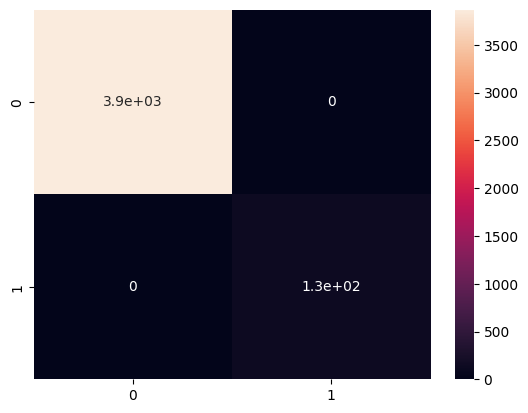

In [ ]:
conf_mat = metrics.confusion_matrix(target_test, predictions) # Use predictions instead of feature
# visualize the conf_mat using sns
sns.heatmap(conf_mat, annot=True)
plt.show()

# Bagian Baru

In [ ]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 1.0
Sensitvity  = 1.0
Specificity = 1.0
Precision   = 1.0


In [ ]:
feature_test

array([[1538,    0],
       [2886,    1],
       [1576,    0],
       ...,
       [1498,    0],
       [1521,    0],
       [1446,    0]])